# 1D Bar under tension/compresion (Hello world example)

Weak formulation:
Find $u$ s.t.
\begin{equation}
\int_0^L EAu'(x)\delta u'(x)\ \mathrm{d}x - \int_0^L f(x)\delta u(x)\ \mathrm{d}x = 0, \forall \delta u
\end{equation}

In [1]:
%load_ext tikzmagic

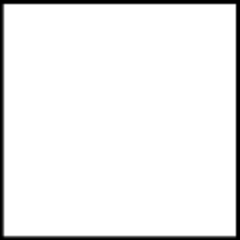

In [2]:
%tikz \draw (0,0) rectangle (1,1);

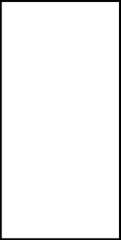

In [3]:
%tikz \draw (0,0) rectangle (1,2);

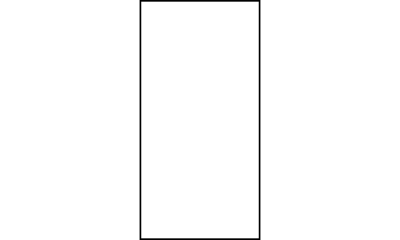

In [4]:
%%tikz -f svg
\input{input.tikz};

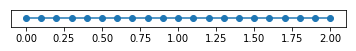

In [3]:
import fenics as fe
import matplotlib.pyplot as plt

# --------------------
# Parameters
# --------------------
E = 10.0  # Young's modulus
A = 0.5  # Cross-section area of bar
l = 2.0  # Length of bar
n = 20  # Number of elements
f = 3.0  # Load intensity

# --------------------
# Geometry
# --------------------
mesh = fe.IntervalMesh(n, 0.0, l)

fe.plot(mesh)
plt.show()

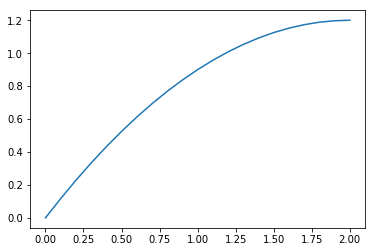

In [4]:
# --------------------
# Function spaces
# --------------------
V = fe.FunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)

# --------------------
# Functions and classes
# --------------------
def left(x, on_boundary):
    return fe.near(x[0], 0.0) and on_boundary

# --------------------
# Boundary conditions
# --------------------
bc = fe.DirichletBC(V, 0.0, left)

# --------------------
# Weak form
# --------------------
a = E*A*u_tr.dx(0)*u_test.dx(0)*fe.dx
l = f*u_test*fe.dx

# --------------------
# Solver
# --------------------
u = fe.Function(V)
fe.solve(a == l, u, bc)

# --------------------
# Post-process
# --------------------
fe.plot(u)
plt.show()